<h2>K Means Clustering</h2>
<h3>Groups the data points depending on required clusters(groups) by using the nearest point from the centroid of each cluster</h3>
<img src="../../images/kmeans.png" width="450px">

<h2>The Elbow Method</h2>
<h3>Used to find the best/optimal cluster value for the given data set</h3>
<p>There are so many types in elbow but we use WCSS</p>
<img src="../../images/wcss-formula.png" width="450px">
<img src="../../images/elbow-method.png" width="450px">
<img src="../../images/elbow-method-2.png" width="450px">

<h3>The K-means is always random so it many times produces bad results by grouping unnecessary clusters</h3>
<h3>So we use K-Means++ which will choose the initial cluster-centroid as random then it will find other cluster-centroids using that point</h3>
<img src="../../images/kmeans++.png" width="450px">

# K-Means Clustering

## Importing the libraries

In [65]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [66]:
dataset = pd.read_csv('../../datasets/Mall_Customers.csv')
X = dataset.iloc[:,3:5].values

# HERE WHEN WE ARE DOING CLUSTERING WE ONLY NEED X's VALUES SINCE WE ONLY WANT TO GROUP

# print 5 values for above X array
print(X[0:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


## Using the elbow method to find the optimal number of clusters

c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

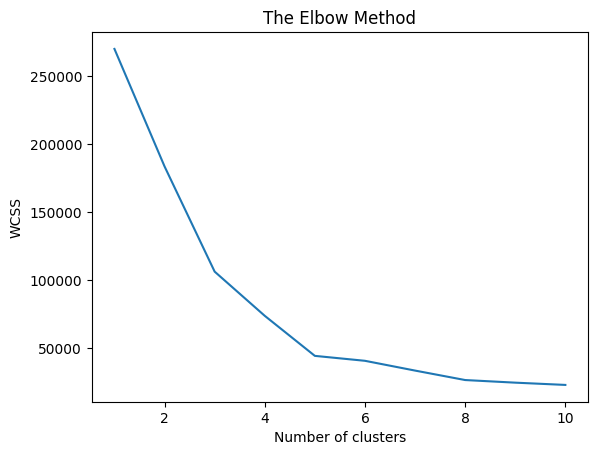

In [67]:
from sklearn.cluster import KMeans

wcss = []

# find the best in 10 clusters
for i in range(1,11):
  model = KMeans(init='k-means++', n_clusters=i, random_state=42 )
  model.fit(X)
  wcss.append(model.inertia_)

# plot for the (1 to 10) cluster numbers V/S wcss values
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset for 5th Cluster Value

In [68]:
model = KMeans(init='k-means++', n_clusters=5, random_state=42 )
y_pred = model.fit_predict(X)

c:\Users\Amaan M k\anaconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualising data before clustering

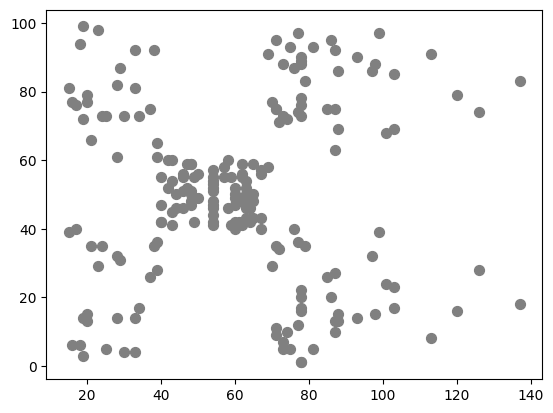

In [71]:
# create new data variable
data = dataset.iloc[:,3:5].values

# plot all data
plt.scatter(data[:,0],data[:,1], s=50, c='grey')

## Visualising the clusters

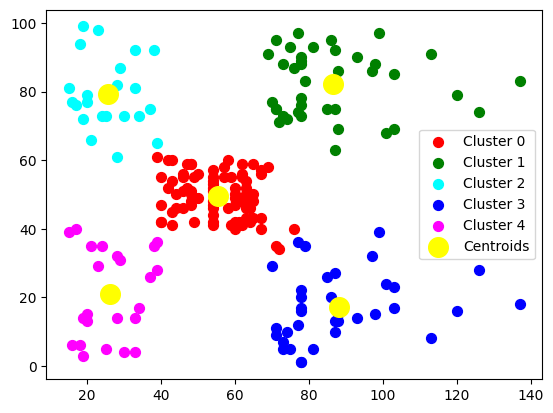

In [ ]:
# plot 5 clusters (0 to 4)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50, c='red', label='Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50, c='green', label='Cluster 1')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50, c='cyan', label='Cluster 2')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50, c='blue', label='Cluster 3')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50, c='magenta', label='Cluster 4')

# plot the cluster-centroids
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

plt.legend()